In [1]:
from mueller_matrices import M_Retarder, M_Diattenuator, M_rotate, M_LinearPolarizer, stokes2ellipse
from plotting import plotEllipse, plotEllipseStokes
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Simulating Different LC Configurations

In [2]:
HWP = M_Retarder(theta=0,delta=np.pi/4)
QWP = M_Retarder(theta=np.pi/4,delta=np.pi/2)

HWP
# HWP

Matrix([
[1, 0,                  0,                 0],
[0, 1,                  0,                 0],
[0, 0,  0.707106781186548, 0.707106781186547],
[0, 0, -0.707106781186547, 0.707106781186548]])

In [43]:
#LCP
M_analyzer = sp.Matrix([[1, 0, 0, -1],
                        [0, 0, 0, 0],
                        [0, 0, 0, 0],
                        [-1, 0, 0, 1]])/2

M_analyzerVert = sp.Matrix([[1, 1, 0, 0],
                            [1, 1, 0, 0],
                            [0, 0, 0, 0],
                            [0, 0, 0, 0]])

M_horiz_pol = sp.Matrix([[1,-1,0,0],
                         [-1,1,0,0],
                         [0, 0, 0, 0],
                         [0, 0, 0, 0]])

M_lin_45 = M_rotate(M_analyzerVert, np.pi/4)
M_lin_90 = M_rotate(M_analyzerVert, np.pi/2)
M_lin_135 = M_rotate(M_analyzerVert, 3*np.pi/4)

M_60 = M_rotate(M_analyzerVert, -np.pi/3)
M_120 = M_rotate(M_analyzerVert, -2*np.pi/3)



In [44]:
%%time
lca = np.arange(-1.5,1.5,0.01)
lcb = np.arange(-1.5,1.5,0.01)
S_in = sp.Matrix([1, -1, 0, 0])

# get ellipticity, orientation
e = np.empty([len(lca),len(lcb)])
theta = np.empty([len(lca),len(lcb)])
S0 = np.empty([len(lca),len(lcb)])
S1 = np.empty([len(lca),len(lcb)])
S2 = np.empty([len(lca),len(lcb)])
S3 = np.empty([len(lca),len(lcb)])

for i in range(len(lca)):
    for j in range(len(lcb)):
        M_uni = M_Retarder(theta=np.pi, delta = lcb[j]*2*np.pi) * M_Retarder(theta=3*np.pi/4, delta = lca[i]*2*np.pi)
        S_out = M_uni * S_in
#         S_final = M_analyzer * S_out
        S_final = S_out
        S0[i,j] = S_final[0]
        S1[i,j] = S_final[1]
        S2[i,j] = S_final[2]
        S3[i,j] = S_final[3]
        ellipt,orient=stokes2ellipse(np.array(S_out).astype(np.float64))
        e[i,j] = ellipt
        theta[i,j] = orient

CPU times: user 1min 38s, sys: 238 ms, total: 1min 39s
Wall time: 1min 39s


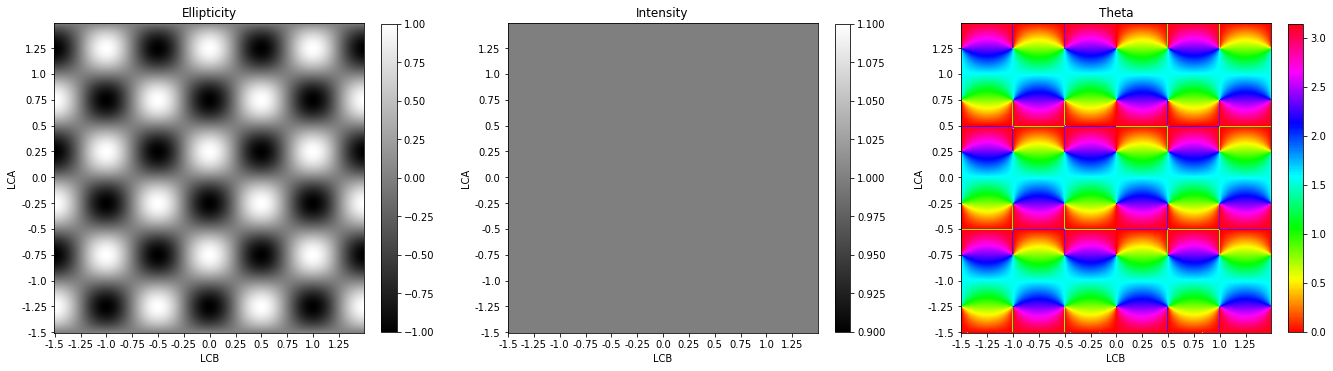

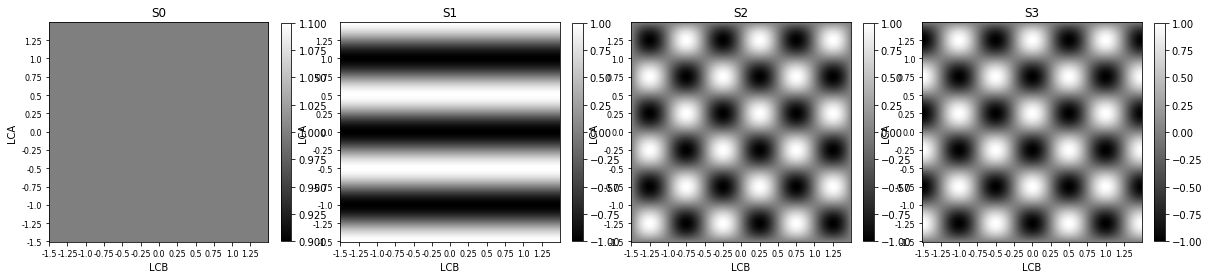

In [45]:
fig, ax = plt.subplots(1,3, figsize=(20,20))
fig.tight_layout(pad=8)
im1 = ax[0].imshow(e, "gray", origin = 'lower')
ax[0].set_title('Ellipticity')
ax[0].set_xlabel('LCB')
ax[0].set_ylabel('LCA')
ax[0].set_xticks(np.arange(0,300,25))
ax[0].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[0].set_yticks(np.arange(0,300,25))
ax[0].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im1, ax=ax[0], fraction=0.045)

im2 = ax[1].imshow(S0, "gray", origin = 'lower')
ax[1].set_title('Intensity')
ax[1].set_xlabel('LCB')
ax[1].set_ylabel('LCA')
ax[1].set_xticks(np.arange(0,300,25))
ax[1].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[1].set_yticks(np.arange(0,300,25))
ax[1].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im2, ax=ax[1], fraction=0.045)

im3 = ax[2].imshow(theta, "hsv", origin = 'lower')
ax[2].set_title('Theta')
ax[2].set_xlabel('LCB')
ax[2].set_ylabel('LCA')
ax[2].set_xticks(np.arange(0,300,25))
ax[2].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[2].set_yticks(np.arange(0,300,25))
ax[2].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im3, ax=ax[2], fraction=0.045)
# fig.savefig('/Users/cameron.foltz/Desktop/SlidePics/200824_Calibration/sim_overview.png')


fig, ax = plt.subplots(1,4, figsize=(20,20))
im1 = ax[0].imshow(S0, "gray", origin = 'lower')
ax[0].set_title('S0')
ax[0].set_xlabel('LCB')
ax[0].set_ylabel('LCA')
ax[0].set_xticks(np.arange(0,300,25))
ax[0].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
ax[0].set_yticks(np.arange(0,300,25))
ax[0].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
fig.colorbar(im1, ax=ax[0], fraction=0.045)


im2 = ax[1].imshow(S1, "gray", origin = 'lower')
ax[1].set_title('S1')
ax[1].set_xlabel('LCB')
ax[1].set_ylabel('LCA')
ax[1].set_xticks(np.arange(0,300,25))
ax[1].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
ax[1].set_yticks(np.arange(0,300,25))
ax[1].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
fig.colorbar(im2, ax=ax[1], fraction=0.045)

im3 = ax[2].imshow(S2, "gray", origin = 'lower')
ax[2].set_title('S2')
ax[2].set_xlabel('LCB')
ax[2].set_ylabel('LCA')
ax[2].set_xticks(np.arange(0,300,25))
ax[2].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
ax[2].set_yticks(np.arange(0,300,25))
ax[2].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
fig.colorbar(im3, ax=ax[2], fraction=0.045)

im4 = ax[3].imshow(S3, "gray", origin = 'lower')
ax[3].set_title('S3')
ax[3].set_xlabel('LCB')
ax[3].set_ylabel('LCA')
ax[3].set_xticks(np.arange(0,300,25))
ax[3].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
ax[3].set_yticks(np.arange(0,300,25))
ax[3].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
fig.colorbar(im4, ax=ax[3], fraction=0.045)

## ZOOM IN

Run the same simulation but confine the region to LCA: [.2, .3], LCB: [.45,.55]

In [25]:
%%time

lca_z = np.arange(0.2,0.3,0.0005)
lcb_z = np.arange(0.45,0.55-0.0005,0.0005)
S_in = sp.Matrix([1, -1, 0, 0])

# get ellipticity, orientation
ez = np.empty([len(lca_z),len(lcb_z)])
thetaz = np.empty([len(lca_z),len(lcb_z)])
thetaz_corr = np.empty([len(lca_z),len(lcb_z)])
S0z = np.empty([len(lca_z),len(lcb_z)])
S1z = np.empty([len(lca_z),len(lcb_z)])
S2z = np.empty([len(lca_z),len(lcb_z)])
S3z = np.empty([len(lca_z),len(lcb_z)])


for i in range(len(lca_z)):
    for j in range(len(lcb_z)):
        M_uni = M_Retarder(theta=np.pi, delta = lcb_z[j]*2*np.pi) * M_Retarder(theta=3*np.pi/4, delta = lca_z[i]*2*np.pi)
        S_out = M_uni * S_in
        S_final = S_out
        S0z[i,j] = S_final[0]
        S1z[i,j] = S_final[1]
        S2z[i,j] = S_final[2]
        S3z[i,j] = S_final[3]
        ellipt,orient=stokes2ellipse(np.array(S_out).astype(np.float64))
        ez[i,j] = ellipt
        thetaz[i,j] = orient

CPU times: user 46.1 s, sys: 140 ms, total: 46.2 s
Wall time: 46.6 s


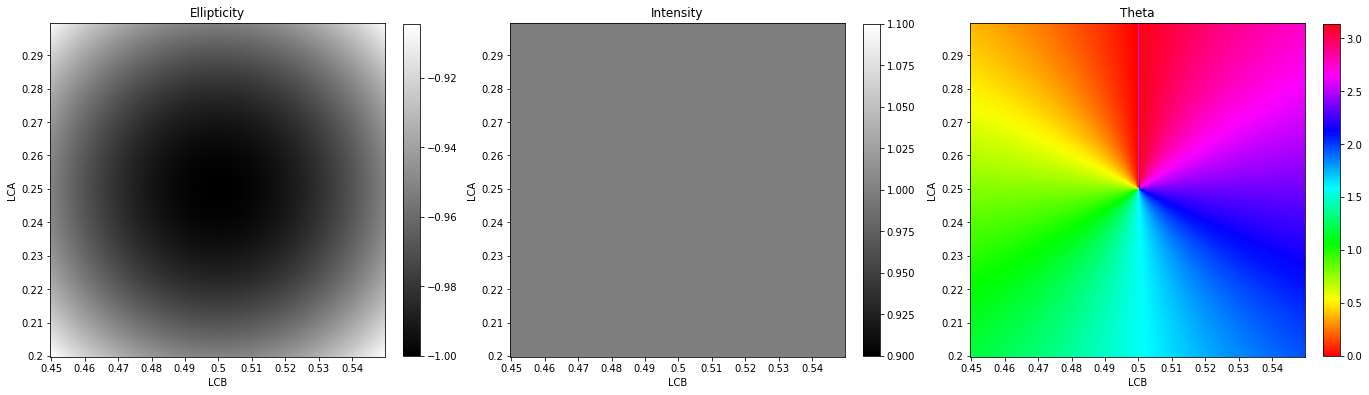

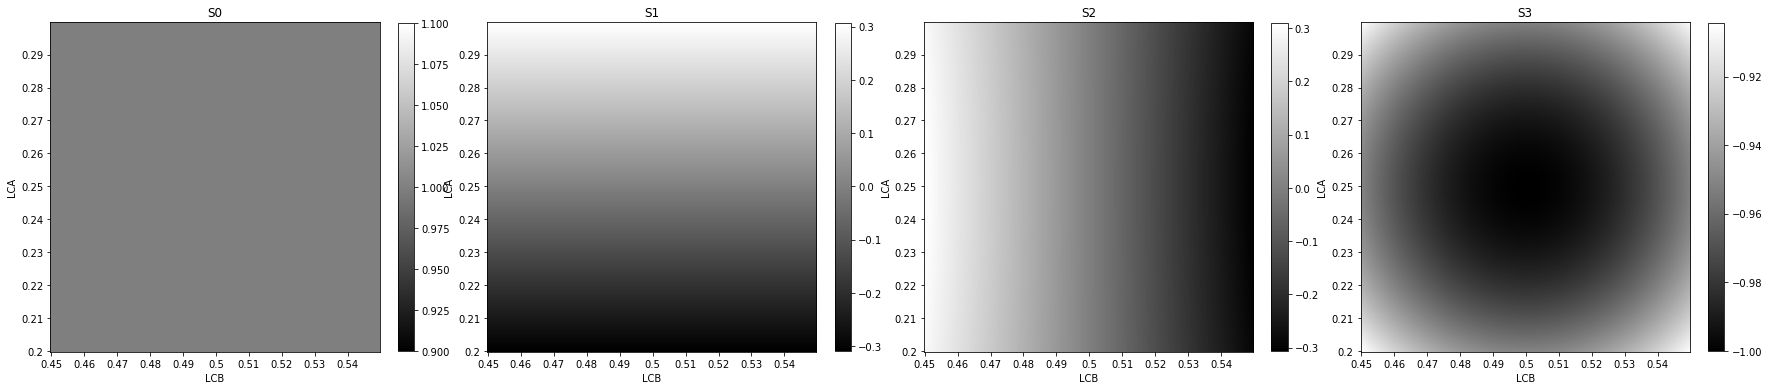

In [26]:
y_range = [0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29]
x_range = [0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54]


fig, ax = plt.subplots(1,3, figsize=(20,20))
fig.tight_layout(pad=6)
im1 = ax[0].imshow(ez, "gray", origin = 'lower')
ax[0].set_title('Ellipticity')
ax[0].set_xlabel('LCB')
ax[0].set_ylabel('LCA')
ax[0].set_xticks(np.arange(0,200,20))
ax[0].set_xticklabels(x_range, fontsize=10)
ax[0].set_yticks(np.arange(0,200,20))
ax[0].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im1, ax=ax[0], fraction=0.045)

im2 = ax[1].imshow(S0z, "gray", origin = 'lower')
ax[1].set_title('Intensity')
ax[1].set_xlabel('LCB')
ax[1].set_ylabel('LCA')
ax[1].set_xticks(np.arange(0,200,20))
ax[1].set_xticklabels(x_range, fontsize=10)
ax[1].set_yticks(np.arange(0,200,20))
ax[1].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im2, ax=ax[1], fraction=0.045)

im3 = ax[2].imshow(thetaz, "hsv", origin = 'lower')
ax[2].set_title('Theta')
ax[2].set_xlabel('LCB')
ax[2].set_ylabel('LCA')
ax[2].set_xticks(np.arange(0,200,20))
ax[2].set_xticklabels(x_range, fontsize=10)
ax[2].set_yticks(np.arange(0,200,20))
ax[2].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im3, ax=ax[2], fraction=0.045)

fig, ax = plt.subplots(1,4, figsize=(30,30))
im1 = ax[0].imshow(S0z, "gray", origin = 'lower')
ax[0].set_title('S0')
ax[0].set_xlabel('LCB')
ax[0].set_ylabel('LCA')
ax[0].set_xticks(np.arange(0,200,20))
ax[0].set_xticklabels(x_range, fontsize=10)
ax[0].set_yticks(np.arange(0,200,20))
ax[0].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im1, ax=ax[0], fraction=0.045)


im2 = ax[1].imshow(S1z, "gray", origin = 'lower')
ax[1].set_title('S1')
ax[1].set_xlabel('LCB')
ax[1].set_ylabel('LCA')
ax[1].set_xticks(np.arange(0,200,20))
ax[1].set_xticklabels(x_range, fontsize=10)
ax[1].set_yticks(np.arange(0,200,20))
ax[1].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im2, ax=ax[1], fraction=0.045)

im3 = ax[2].imshow(S2z, "gray", origin = 'lower')
ax[2].set_title('S2')
ax[2].set_xlabel('LCB')
ax[2].set_ylabel('LCA')
ax[2].set_xticks(np.arange(0,200,20))
ax[2].set_xticklabels(x_range, fontsize=10)
ax[2].set_yticks(np.arange(0,200,20))
ax[2].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im3, ax=ax[2], fraction=0.045)

im4 = ax[3].imshow(S3z, "gray", origin = 'lower')
ax[3].set_title('S3')
ax[3].set_xlabel('LCB')
ax[3].set_ylabel('LCA')
ax[3].set_xticks(np.arange(0,200,20))
ax[3].set_xticklabels(x_range, fontsize=10)
ax[3].set_yticks(np.arange(0,200,20))
ax[3].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im4, ax=ax[3], fraction=0.045)
# fig.savefig('/Users/cameron.foltz/Desktop/Kazansky/sim_plot2.png')

## Finding which LC Values correspond to 0, 60, 120 deg states

Reconstruct-Order assumes that the Universal Polarizer is orientated 0 deg along the x-axis.  In this simulation, with have it oriented 90 deg along the x-axis, so we need to account for that in finding the 0,60,120 deg states (in reference frame of reconstruct order) by subtracting 90 deg from simulated values.

In [55]:
state60 = []
state120 = []
state0 = []

#Append LC values that lie along desired orientation
for i in range(len(thetaz[:,0])):
    for j in range(len(thetaz[0,:])):
        if 5*np.pi/6-.0005 < thetaz[i,j] < 5*np.pi/6 + .0005:
            state60.append((lca_z[i],lcb_z[j]))
        elif (np.pi/6-.0005) < thetaz[i,j] < (np.pi/6 + .0005):
            state120.append((lca_z[i],lcb_z[j]))
            
        elif (np.pi/2-.0005) < thetaz[i,j] < (np.pi/2 + .0005):
            state0.append((lca_z[i],lcb_z[j]))
        

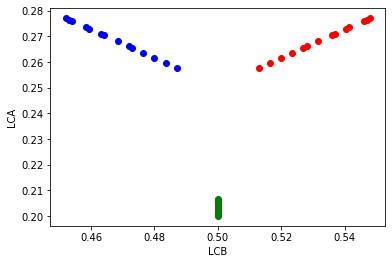

In [56]:
for i in range(len(state60)):
    plt.scatter(state60[i][1], state60[i][0], color = 'red')
    plt.scatter(state120[i][1], state120[i][0], color = 'blue')
    plt.scatter(state0[i][1], state0[i][0], color = 'green')
    plt.xlabel('LCB')
    plt.ylabel('LCA')
    
# plt.title()
plt.show()

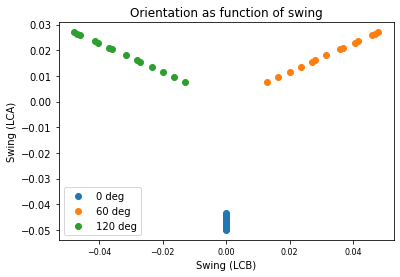

In [58]:
# Transform into swing based off extinction state
swinga0 = []
swingb0 = []
swinga60 = []
swinga120 = []
swingb120 = []
swingb60 = []


for i in range(len(state60)):
    swinga0.append(state0[i][0] - 0.25)
    swingb0.append(state0[i][1] - 0.5)
    swinga60.append(state60[i][0] - 0.25)
    swinga120.append(state120[i][0]- 0.25)
    swingb60.append(state60[i][1] - 0.5)
    swingb120.append(state120[i][1]- 0.5)
    
plt.scatter(swingb0,swinga0, label="0 deg")
plt.scatter(swingb60,swinga60, label="60 deg")
plt.scatter(swingb120,swinga120, label="120 deg")
plt.ylabel('Swing (LCA)')
plt.xlabel('Swing (LCB)')
plt.xticks(fontsize=8)
plt.legend()
plt.title('Orientation as function of swing')
plt.show()

In [41]:
from scipy.stats import linregress
linregress(swinga120, swingb120)

LinregressResult(slope=-1.7933271547729381, intercept=0.0006408380775852277, rvalue=-0.9999457923500247, pvalue=3.6627310457324055e-25, stderr=0.005390534707323527)

## Sanity Checking

In [91]:
M_LCP = sp.Matrix([[1, 0, 0, -1],
                        [0, 0, 0, 0],
                        [0, 0, 0, 0],
                        [-1, 0, 0, 1]])/2

M_RCP = sp.Matrix([[1, 0, 0, 1],
                        [0, 0, 0, 0],
                        [0, 0, 0, 0],
                        [1, 0, 0, 1]])/2

M_uni = M_Retarder(theta=0, delta = 0.5*2*np.pi) * M_Retarder(theta=np.pi/4, delta = 0.25*2*np.pi)
S_out = M_uni * S_in
S_final = M_LCP * S_out

S_final

Matrix([
[0],
[0],
[0],
[0]])